In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books_df = pd.read_csv('books.csv')
books_tags_df = pd.read_csv('book_tags.csv')
ratings_df = pd.read_csv('ratings.csv')

In [3]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [4]:
books_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40200 entries, 0 to 40199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   goodreads_book_id  40200 non-null  int64
 1   tag_id             40200 non-null  int64
 2   count              40200 non-null  int64
dtypes: int64(3)
memory usage: 942.3 KB


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233383 entries, 0 to 233382
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  233383 non-null  int64
 1   book_id  233383 non-null  int64
 2   rating   233383 non-null  int64
dtypes: int64(3)
memory usage: 5.3 MB


In [6]:
books_df.isna().sum()

book_id                       0
goodreads_book_id             0
best_book_id                  0
work_id                       0
books_count                   0
isbn                         11
isbn13                       10
authors                       0
original_publication_year     0
original_title               36
title                         0
language_code                43
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
dtype: int64

In [7]:
books_df.duplicated().sum()

0

In [8]:
books_without_title_count = books_df['original_title'].isnull().sum()
print(f'1. Number of books without an original title: {books_without_title_count}')

1. Number of books without an original title: 36


In [9]:
books_df_cleaned = books_df.dropna(subset=['original_title'])
book_tags_df_cleaned = books_tags_df[books_tags_df['goodreads_book_id'].isin(books_df_cleaned['book_id'])]
ratings_df_cleaned = ratings_df[ratings_df['book_id'].isin(books_df_cleaned['book_id'])]
unique_books_count = books_df_cleaned['book_id'].nunique()
print(f'2. Number of unique books in the dataset: {unique_books_count}')

2. Number of unique books in the dataset: 363


In [10]:
unique_users_count = ratings_df_cleaned['user_id'].nunique()
print(f'3. Number of unique users in the dataset: {unique_users_count}')

3. Number of unique users in the dataset: 40573


In [11]:
unique_tags_count = book_tags_df_cleaned['tag_id'].nunique()
print(f'4. Number of unique tags in the dataset: {unique_tags_count}')

4. Number of unique tags in the dataset: 100


In [12]:
most_used_tag_id = book_tags_df_cleaned['tag_id'].value_counts().idxmax()
print(f'5. Tag_id most frequently used: {most_used_tag_id}')

5. Tag_id most frequently used: 13568


In [13]:
merged_df = pd.merge(book_tags_df_cleaned, books_df_cleaned, left_on='goodreads_book_id', right_on='book_id')
most_tagged_book_title = merged_df['title'].value_counts().idxmax()
print(f'6. Book with the most tags given by users: {most_tagged_book_title}')

6. Book with the most tags given by users: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


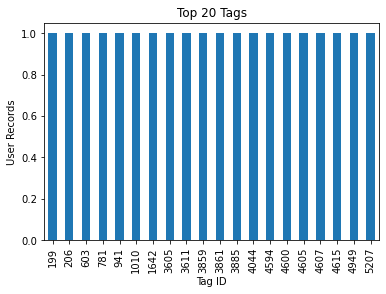

In [14]:
top_tags = book_tags_df_cleaned.groupby('tag_id')['goodreads_book_id'].count().nlargest(20)
top_tags.plot(kind='bar', xlabel='Tag ID', ylabel='User Records', title='Top 20 Tags')

# Show the plot
plt.show()